<a href="https://colab.research.google.com/github/mag381/AI/blob/main/09_%E9%A1%94%E8%A1%A8%E6%83%85%E7%94%BB%E5%83%8F%E3%83%95%E3%82%A1%E3%82%A4%E3%83%AB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import sys, os, glob
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
from PIL import ImageFile

In [2]:
import keras
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

In [3]:
# Bing で画像収集するプログラムをインストール
!pip install icrawler
from icrawler.builtin import BingImageCrawler

In [4]:
def hyouji(files,num_data):
  plt.figure(figsize=(10,8))
  for i, file in enumerate(files):   # files から file を順番に取り出す
    image = Image.open(file)         # 画像ファイルを開く
    image = image.convert("RGB")     # カラーの種類をRGB形式に変換

    if i<num_data:
       ax = plt.subplot(num_data // 3, 4, i+1)
       # 画像を行、列に配置する　3なら1行に3画像を配置する
       plt.tight_layout()            # 画像同士が重ならないようにする
       file_name=os.path.split(file)[1]
       # ファイル名を図のタイトルとして設定する
       ax.set_title(file_name)
    plt.axis('off')
    plt.imshow(image)                   # 画像を表示

In [5]:
#  画像収集

# 画像を保存するフォルダーを指定する
foldername ="happy"
# 収集する画像の枚数を指定する
maisu=20
crawler = BingImageCrawler(storage={"root_dir": foldername })
crawler.crawl(keyword="笑顔 高校生　一人", max_num=maisu)
# ダウンロード不可のサイトの場合 ERROR が表示される

ERROR:downloader:Exception caught when downloading file https://www.photolibrary.jp/mhd5/img845/450-20210702214832.jpg, error: HTTPSConnectionPool(host='www.photolibrary.jp', port=443): Max retries exceeded with url: /mhd5/img845/450-20210702214832.jpg (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x7ab40afcbf50>, 'Connection to www.photolibrary.jp timed out. (connect timeout=5)')), remaining retry times: 2
ERROR:downloader:Exception caught when downloading file https://www.photolibrary.jp/mhd5/img845/450-20210702214832.jpg, error: HTTPSConnectionPool(host='www.photolibrary.jp', port=443): Max retries exceeded with url: /mhd5/img845/450-20210702214832.jpg (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x7ab409944a10>, 'Connection to www.photolibrary.jp timed out. (connect timeout=5)')), remaining retry times: 1
ERROR:downloader:Exception caught when downloading file https://www.photolibrary.jp/mhd5/img845/450-20210702214832.j

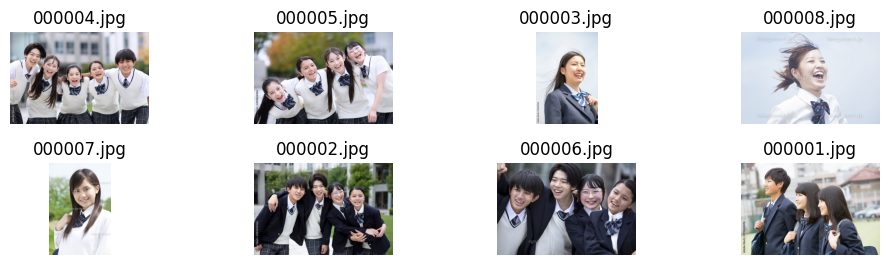

In [6]:
num_data =20

# 条件を満たすファイル名の一覧を glob で取得し、
# 変数 files に格納する
files = glob.glob("./"+foldername+"/*.jpg")
# files に格納された画像データをnum_data の数だけ表示
#
hyouji(files,num_data)

In [11]:
import shutil
import sys
import os

def create_zip(zip_filename, src_dir):
    """
    src_dir ディレクトリ内のファイル群を、
    zip_filename で指定した名前の ZIP ファイルにアーカイブします。
    すでに同名の ZIP ファイルが存在する場合は、確認プロンプトを表示します。
    """
    if os.path.exists(zip_filename):
        answer = input(zip_filename + ' already exists. Overwrite? (y/n): ')
        if (answer != 'y' and answer != 'Y'):
            return
    try:
        name = os.path.splitext(zip_filename)[0]
        shutil.make_archive(name, format='zip', root_dir=src_dir)
    except Exception as e:
        print(e, file=sys.stderr)

In [12]:
create_zip('/content/download.zip','/content/'+foldername)

In [ ]:
from google.colab import files
files.download("/content/download.zip")